In [1]:
import sys
sys.path.append("/Users/Gonzalo/github/elparametrization/PyScripts/ParamBuilder")
sys.path.append("/Users/Gonzalo/github/IC/")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import Core.fitFunctions as fit
from NEW_maps_201607 import *
from active_map import *

x0, y0 = map(np.array, zip(*[PMT_map[ID] for ID in sorted(PMT_map)]))
phi0 = np.arctan2(y0, x0)
c, s = np.cos(phi0), np.sin(phi0)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
datafolder    = '/Users/Gonzalo/Desktop/Tables/S1/'
datafilename  = datafolder + 'S1table.dat'
textfilename  = datafolder + 'NEW_S1parameters.txt'
plotsfilename = datafolder + 'NEW_S1parametrization_plots.root'
paramfilename = datafolder + 'NEW_S1parametrization.root'
zs            = [ 10*i for i in range(2,41) ]
Nphotons      = 3e6
Rdegree       = 4
Zdegree       = 4
Rmax          = 217.5
Nsectors      = 9
AnodeZpos     = None
Ncoronas      = len(set(corona_map.values()))

In [3]:
data = np.loadtxt(datafilename)
IDs = data[:,0]
x, y, z = map(np.array, zip(*[active_map[ID] for ID in IDs]))
r, phi = (x**2 + y**2)**0.5, np.arctan2(y, x)
df = pd.DataFrame({"ID":IDs, "x": x, "y": y, "z": z, "r": r, "phi": phi})

dx = x[np.newaxis].T - x0
dy = y[np.newaxis].T - y0
dr = (dx**2 + dy**2)**0.5
phi = abs(np.arctan2(-s*dx+c*dy, c*dx+s*dy))
for i in sorted(PMT_map):
    istr = str(i)
    df["pmt" + istr] = data[:,1+i]
    df["x" + istr] = -s[i]*dx[:,i] + c[i]*dy[:,i]
    df["y" + istr] =  c[i]*dx[:,i] + s[i]*dy[:,i]
    df["dx" + istr] = dx[:,i]
    df["dy" + istr] = dy[:,i]
    df["dr" + istr] = dr[:,i]
    df["phi" + istr] = phi[:,i]

In [4]:
selection = df.z == 400

In [5]:
d = df[selection & (df.r <= 195.)]

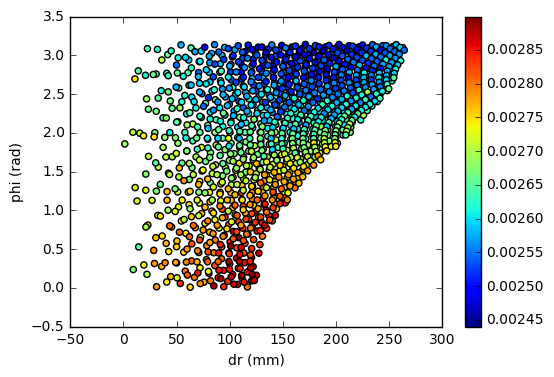

In [6]:
plt.scatter(d.dr0, d.phi0, c=d.pmt0)
plt.xlabel("dr (mm)")
plt.ylabel("phi (rad)")
plt.colorbar()

In [7]:
PMT_map

{0: (-23.9414, 65.7785),
 1: (-44.9951, -53.6231),
 2: (68.9365, -12.1554),
 3: (-0.0, 185.0),
 4: (-118.916, 141.718),
 5: (-182.189, 32.1249),
 6: (-160.215, -92.5),
 7: (-63.2737, -173.843),
 8: (63.2737, -173.843),
 9: (160.215, -92.5),
 10: (182.189, 32.1249),
 11: (118.916, 141.718)}

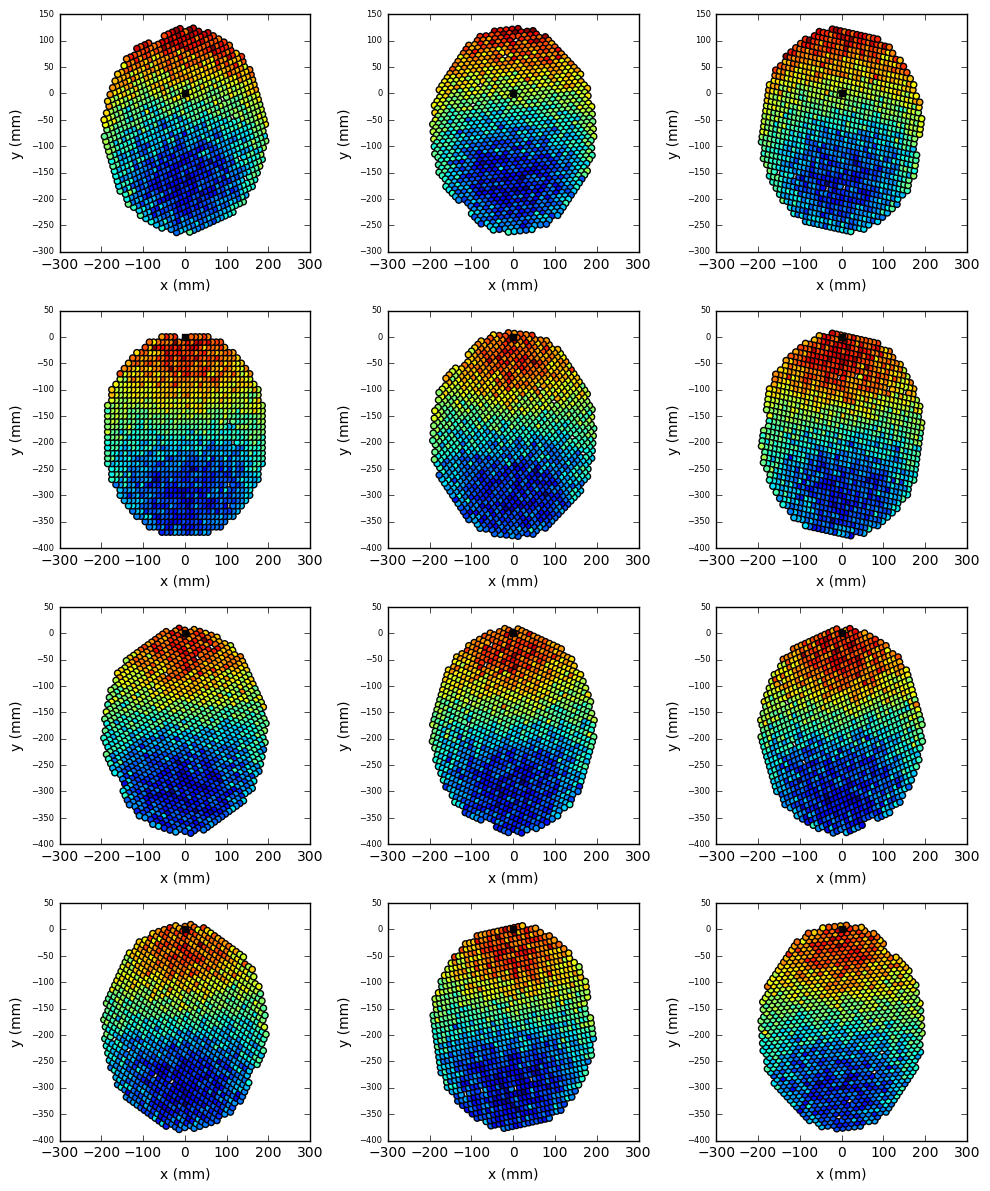

In [8]:
plt.figure().set_size_inches(10,12)
for i in sorted(PMT_map):
    istr = str(i)
    ax = plt.subplot(4, 3, i+1)
    plt.setp(ax.get_yticklabels(), fontsize=6)
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    plt.scatter(d["x" + istr], d["y"+istr], c=d["pmt" + istr])
    plt.scatter(0., 0., marker="s", facecolor="k")
#    plt.scatter(d.x, d.y, c=d["pmt" + istr])
#    plt.scatter(x0[i], y0[i], marker="s", facecolor="k")
#    plt.colorbar()
plt.tight_layout()

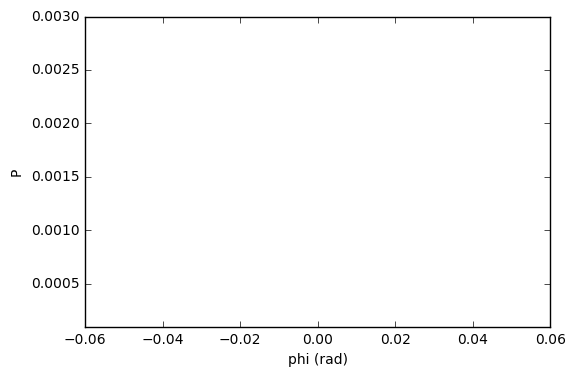

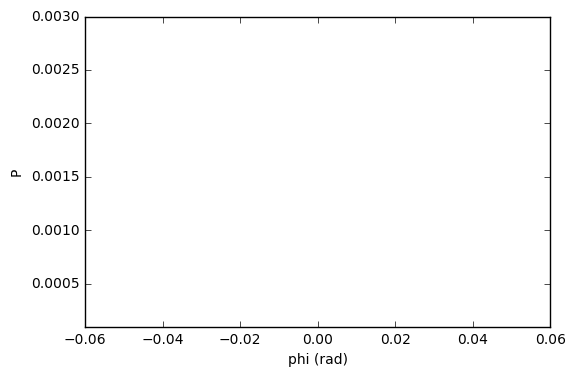

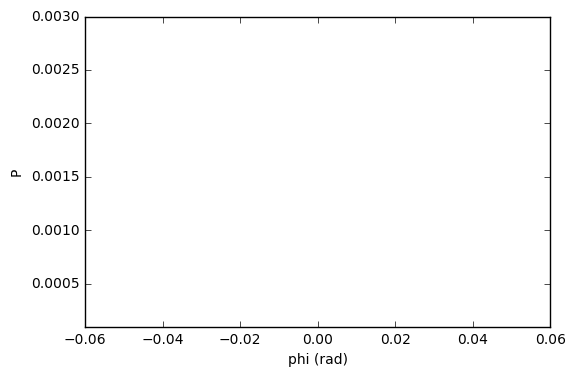

KeyboardInterrupt: 

In [41]:
colors = ["b", "k", "r", "y", "g"] * 200
nsectors = 10
swidth = np.pi/nsectors
for i in range(nsectors):
    dd = d[(i*swidth < d.dr0) & ((i+1)*swidth > d.dr0)]
    plt.scatter(dd.phi0, dd.pmt0, facecolor=colors[i])
    plt.xlabel("phi (rad)")
    plt.ylabel("P")
    plt.ylim(1e-4, 0.003)
    plt.show()
    raw_input()

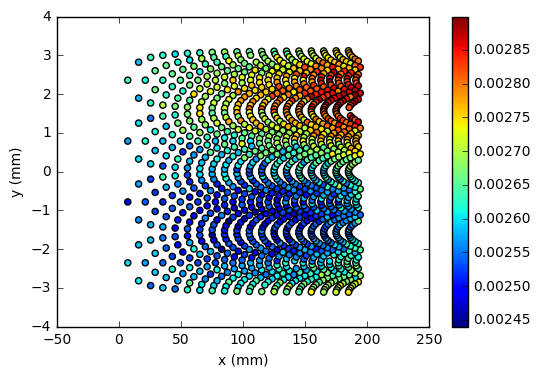

In [18]:
plt.scatter(d.r, d.phi, c=d.pmt0)
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.colorbar()

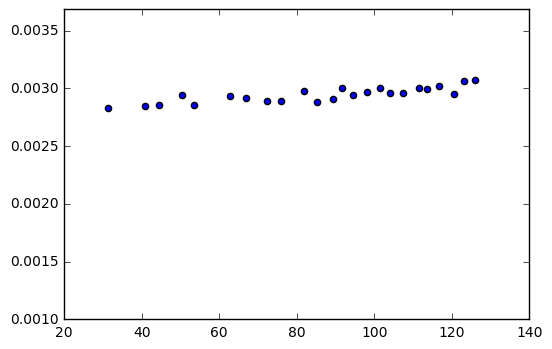

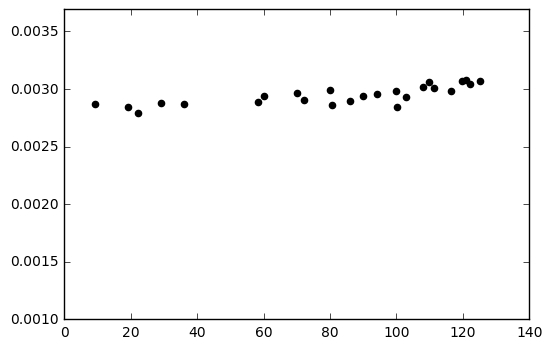

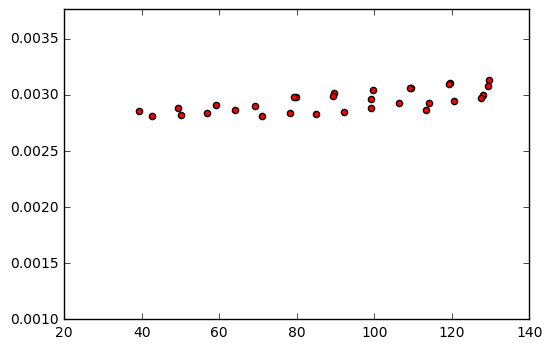

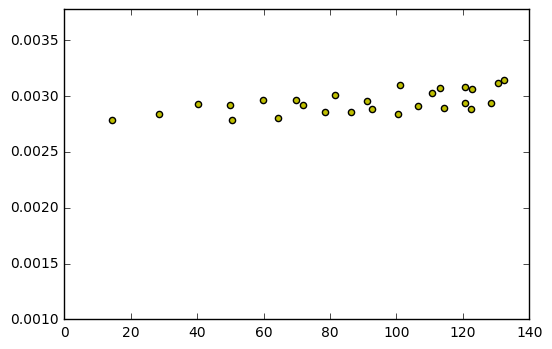

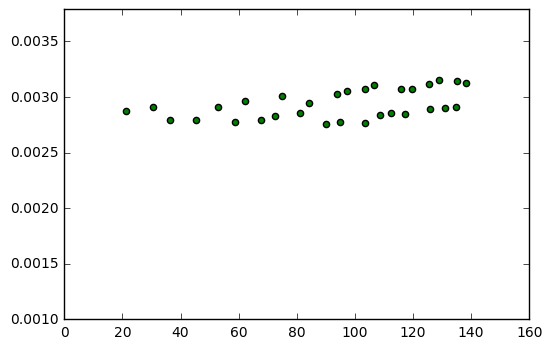

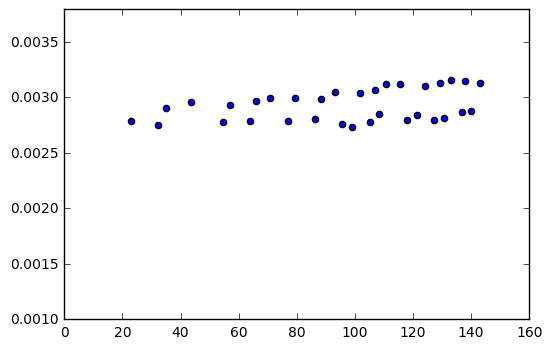

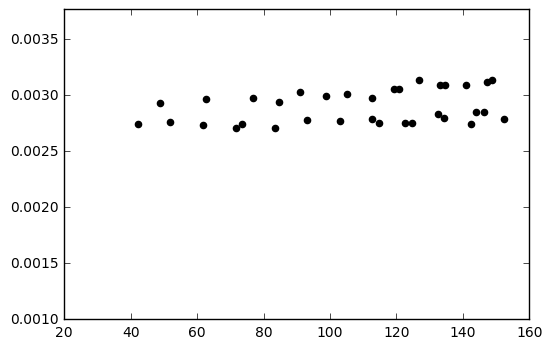

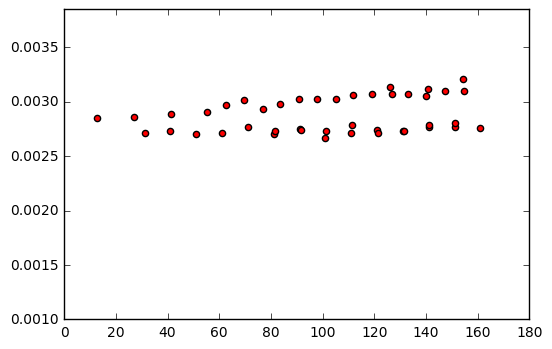

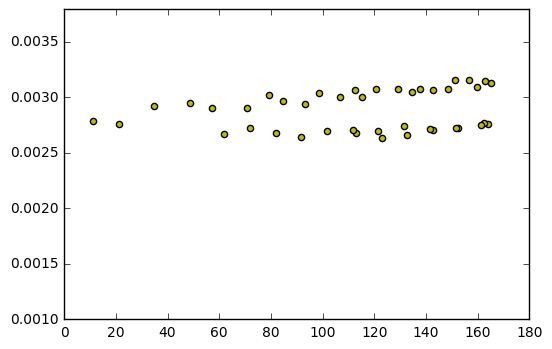

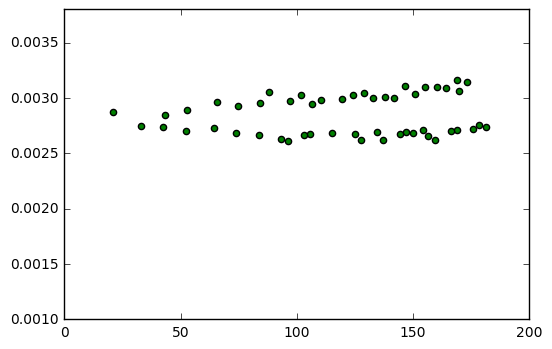

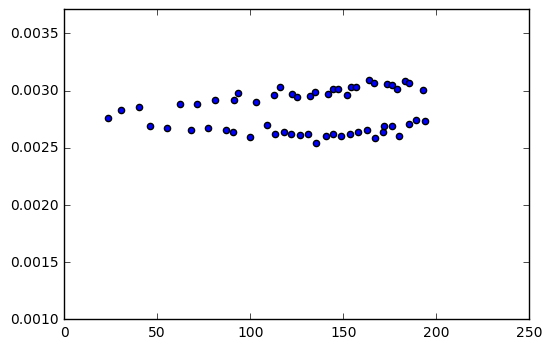

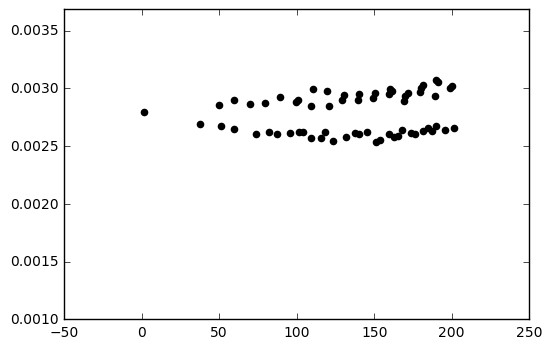

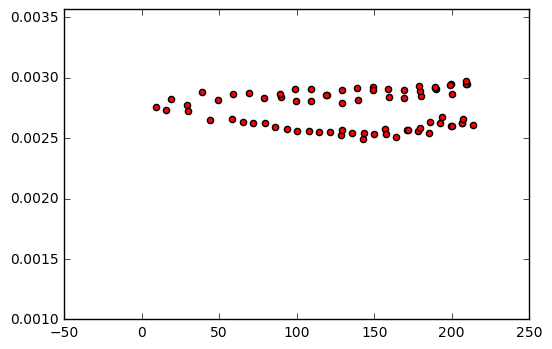

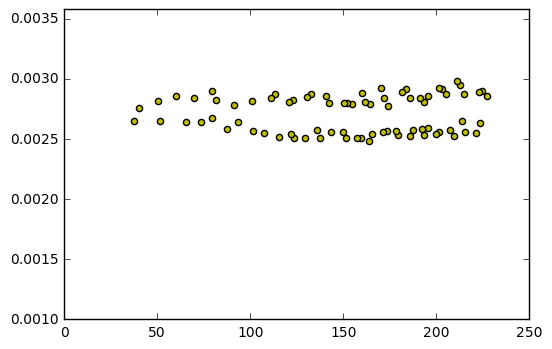

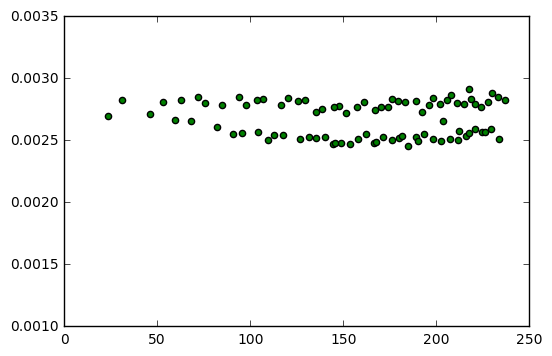

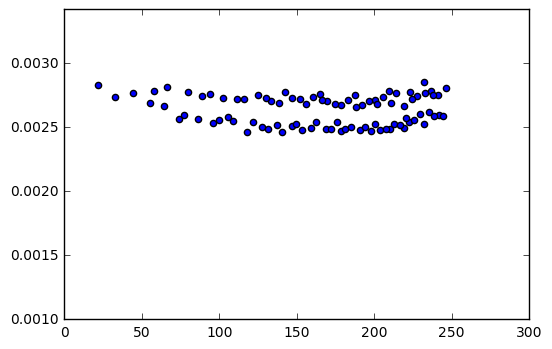

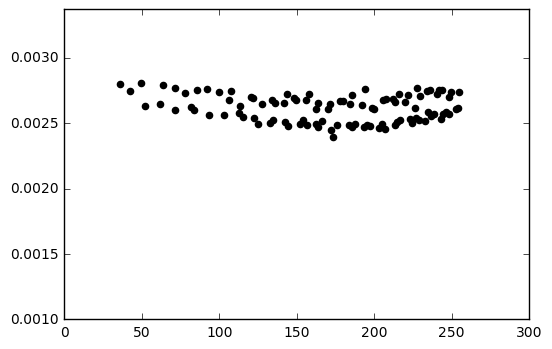

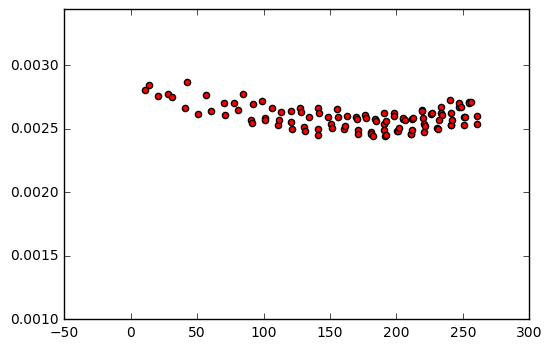

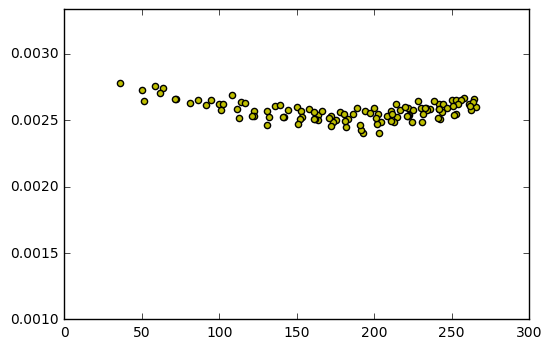

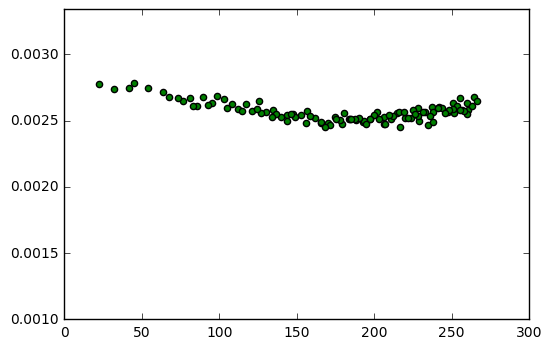

In [153]:
colors = ["b", "k", "r", "y", "g"] * 200
nsectors = 20
swidth = 1.0/nsectors
for i in range(nsectors):
    dd = d[(i*swidth*pi < d.phi0) & ((i+1)*swidth*pi > d.phi0) & (d.pmt0>1e-4)]
    plt.scatter(dd.dr0, dd.pmt0, facecolor=colors[i])
#    plt.ylim(np.min(dd.pmt0), np.max(dd.pmt0))
    plt.ylim(1e-3, np.max(dd.pmt0)*1.2)
    plt.show()
    raw_input()


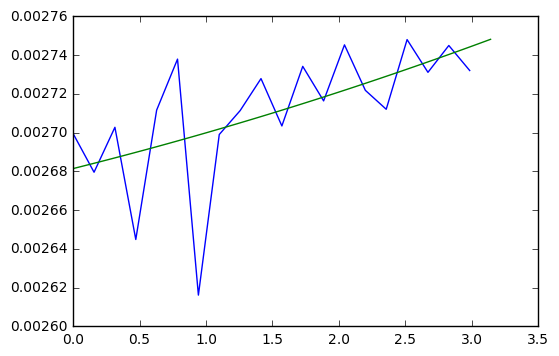

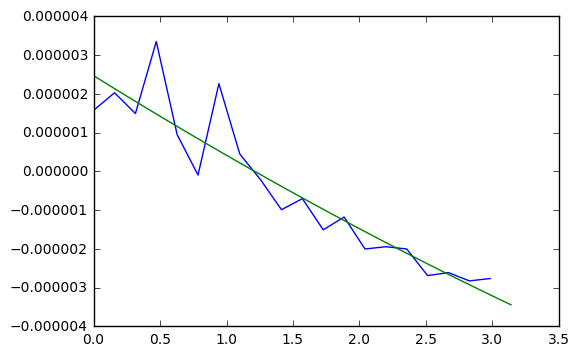

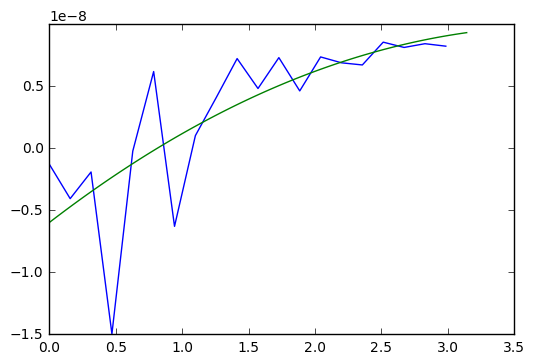

In [22]:
nsectors = 20
swidth = 1.0/nsectors
pars = []
for i in range(nsectors):
    dd = d[(i*swidth*pi < d.phi0) & (d.phi0 < (i+1)*swidth*pi) & (d.pmt0>1e-4)]
#    print i, i*swidth*pi, (i+1)*swidth*pi, dd.pmt0.size
#    plt.scatter(dd.dr0, dd.pmt0, facecolor=colors[i])
#    plt.ylim(0.0022, 0.0026)
    f, p, e = fit.fit("polynom", dd.dr0, dd.pmt0, [1., 1., 1.])
    pars.append(p)
#    x = np.linspace(0., 300., 100.)
#    y = f(x)
#    plt.plot(x, y)
#    plt.show()
#    raw_input()

x = np.linspace(0., pi, 100.)
x0 = np.arange(nsectors) * pi * swidth

plt.plot(x0, zip(*pars)[0])
p0 = fit.fit("polynom", x0, zip(*pars)[0], [1e-2, 1., 1.])[0]
y = p0(x)
plt.plot(x, y)

plt.figure()
plt.plot(x0, zip(*pars)[1])
p1 = fit.fit("polynom", x0, zip(*pars)[1], [1e-2, 1., 1.])[0]
y = p1(x)
plt.plot(x, y)

plt.figure()
plt.plot(x0, zip(*pars)[2])
p2 = fit.fit("polynom", x0, zip(*pars)[2], [1e-2, 1., 1.])[0]
y = p2(x)
plt.plot(x, y)


f = lambda dr, phi: p0(phi) + p1(phi) * dr + p2(phi) * dr**2


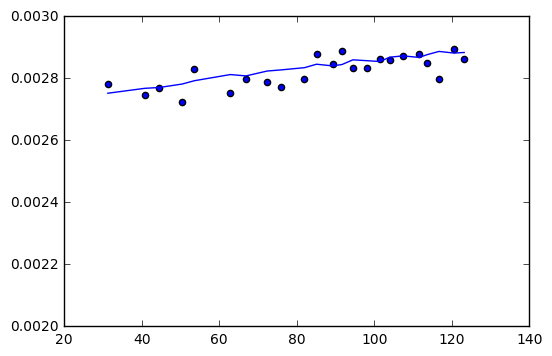

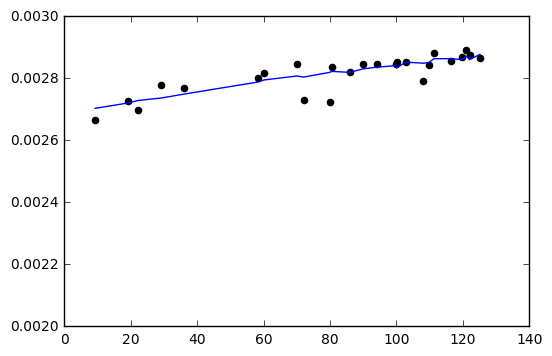

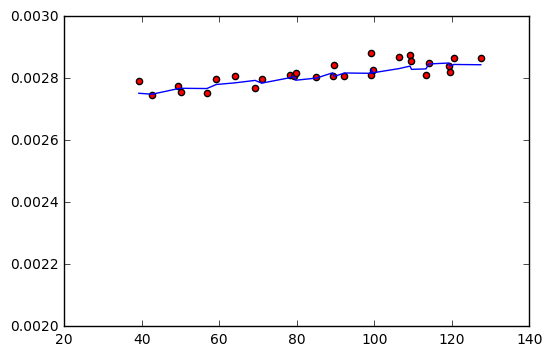

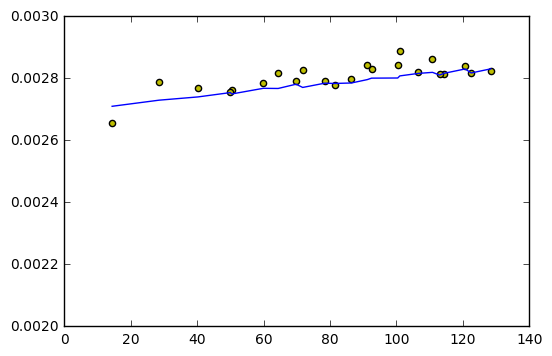

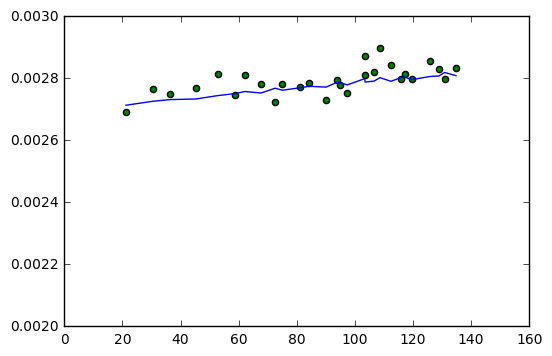

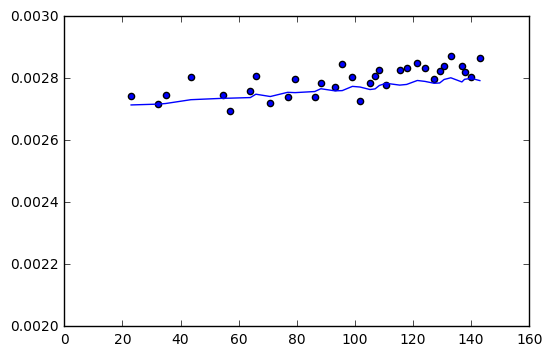

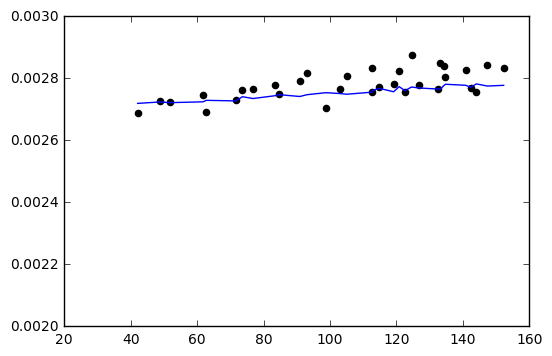

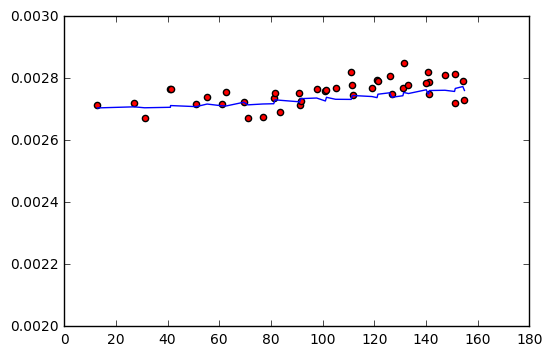

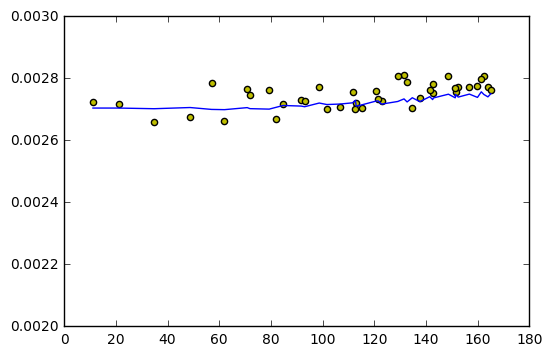

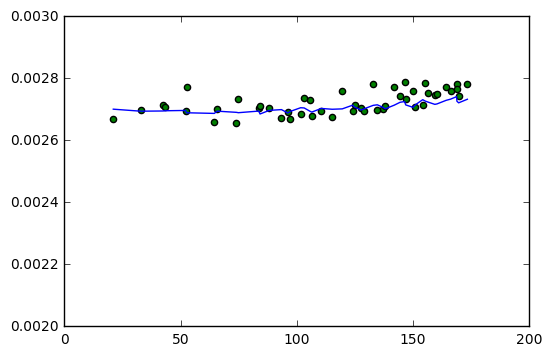

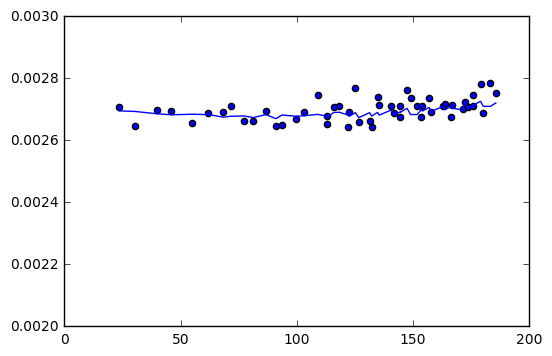

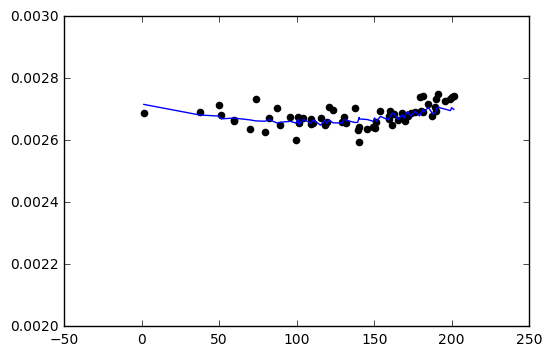

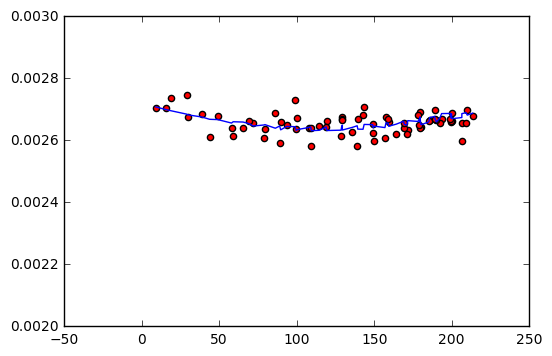

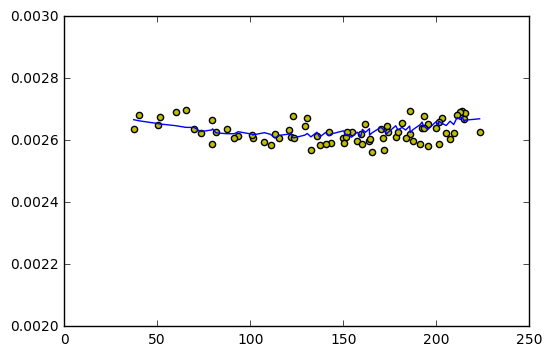

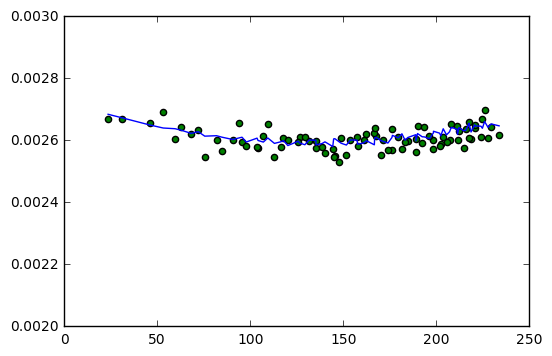

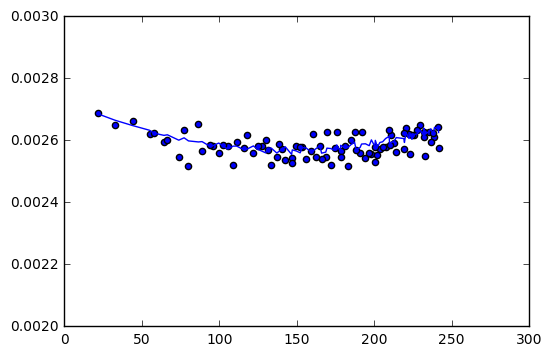

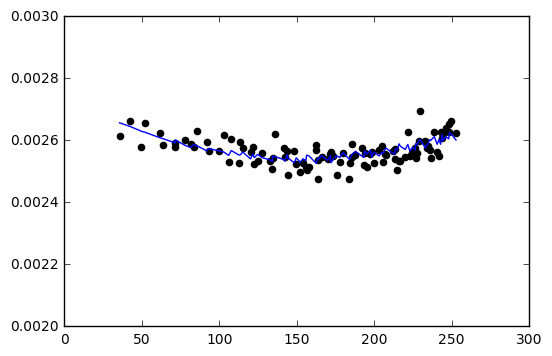

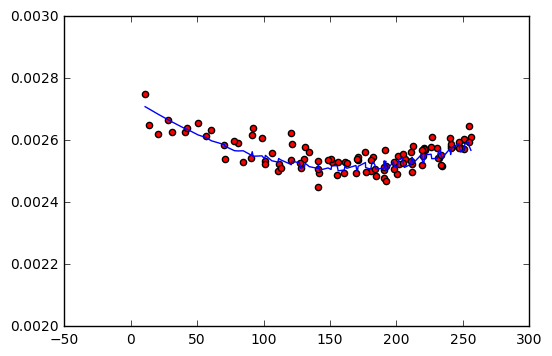

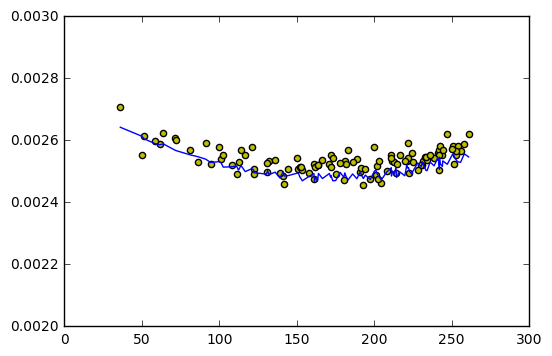

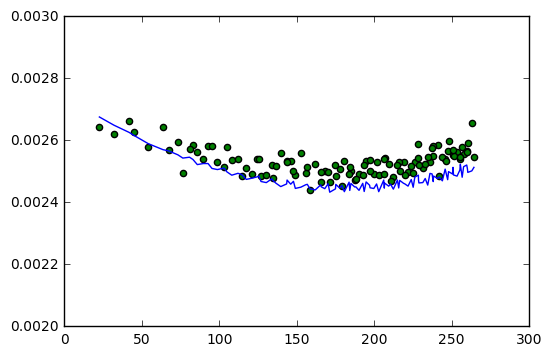

In [23]:
colors = ["b", "k", "r", "y", "g"] * 200
nsectors = 20
swidth = 1.0/nsectors
for i in range(nsectors):
    dd = d[(i*swidth*pi < d.phi0) & ((i+1)*swidth*pi > d.phi0) & (d.pmt0>0.002)]
    plt.scatter(dd.dr0, dd.pmt0, facecolor=colors[i])
    plt.ylim(0.002, 0.003)
    x, y = map(np.array, zip(*sorted(zip(dd.dr0, dd.phi0))))
    plt.plot(x, f(x,y))
    plt.show()
    raw_input()


In [26]:
from math import *
x, y = 9., 50.
x0, y0 = -160.215, -92.5
dx, dy = x-x0, y-y0
2*pi-abs(atan2(dy, dx) - atan2(y0, x0))

2.9652868290003065

In [27]:
from math import *
x, y = 9., 50.
x0, y0 = -160.215, -92.5
dx, dy = x-x0, y-y0
phi = atan2(y0, x0)
c, s = cos(phi), sin(phi)
abs(atan2(-s*dx + c*dy, c*dx + s*dy))

2.9652868290003065

In [28]:
PMT_map

{0: (23.9414, 65.7785),
 1: (44.9951, -53.6231),
 2: (-68.9365, -12.1554),
 3: (0.0, 185.0),
 4: (118.916, 141.718),
 5: (182.189, 32.1249),
 6: (160.215, -92.5),
 7: (63.2737, -173.843),
 8: (-63.2737, -173.843),
 9: (-160.215, -92.5),
 10: (-182.189, 32.1249),
 11: (-118.916, 141.718)}

In [31]:
x0

array([  23.9414,   44.9951,  -68.9365,    0.    ,  118.916 ,  182.189 ,
        160.215 ,   63.2737,  -63.2737, -160.215 , -182.189 , -118.916 ])

In [32]:
print np.mean(x0), np.mean(y0)

2.36847578587e-15 -1.66666666649e-05


In [35]:
x0, y0 = zip(*PMT_map.values())
phi0 = np.arctan2(y0, x0)
c, s = np.cos(phi0), np.sin(phi0)
def art(x, y):
    dx, dy = x - x0, y - y0
    phi = abs(np.arctan2(dy, dx) - phi0)
    phi[phi>np.pi] = 2*np.pi - phi[phi>np.pi]
    return phi

def py(x, y):
    dx, dy = x - x0, y - y0
    return abs(np.arctan2(-s*dx+c*dy, c*dx+s*dy))

In [37]:
x, y = np.random.uniform(-100., 100., size=2)
print art(x, y)
print py(x, y)

[ 3.06939415  2.05449277  2.19159875  3.08748364  3.01053296  2.84998861
  2.76709768  2.86957513  3.05776571  2.79426722  2.78726413  2.91189113]
[ 3.06939415  2.05449277  2.19159875  3.08748364  3.01053296  2.84998861
  2.76709768  2.86957513  3.05776571  2.79426722  2.78726413  2.91189113]


In [40]:
N=int(1e7)
x = np.random.uniform(-200., 200., size=N)[np.newaxis].T
y = np.random.uniform(-200., 200., size=N)[np.newaxis].T

%time art(x, y)
%time py(x, y)

CPU times: user 10.2 s, sys: 8.3 s, total: 18.5 s
Wall time: 34.3 s
CPU times: user 10.3 s, sys: 18.6 s, total: 28.9 s
Wall time: 1min 11s


array([[ 3.05401004,  2.63021612,  2.62700605, ...,  2.96648739,
         2.95532183,  3.02230775],
       [ 2.07662484,  2.79438509,  0.98395222, ...,  2.37422063,
         2.79314892,  2.41906118],
       [ 2.55774681,  0.33142898,  2.3583671 , ...,  2.56061308,
         2.80813644,  3.08292728],
       ..., 
       [ 2.7151864 ,  2.62151612,  2.64707324, ...,  2.96947179,
         2.82551871,  2.77936613],
       [ 2.01339121,  0.51239819,  2.6115398 , ...,  2.56455447,
         2.95547798,  2.9416021 ],
       [ 1.16587216,  1.58621479,  2.99496831, ...,  3.06047464,
         2.85280579,  2.47820584]])

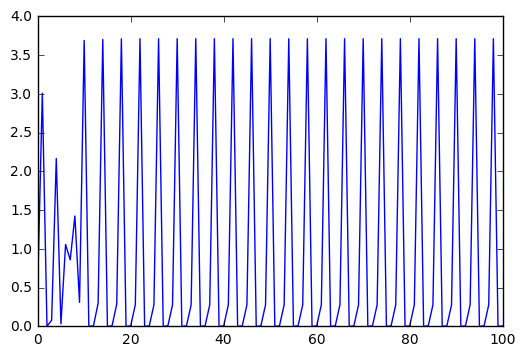

In [29]:
from math import exp
x = [0.5]
r = 3.59
for i in range(100):
    x.append(x[-1] * exp(r*(1-x[-1])))

plt.plot(x)